In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import threading

Recording... Press Ctrl+C to stop.


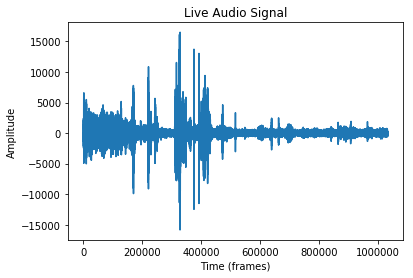

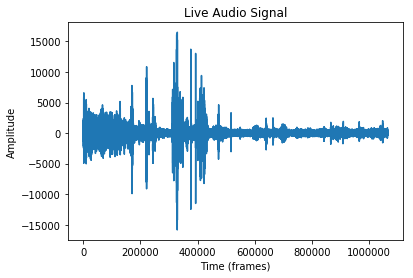

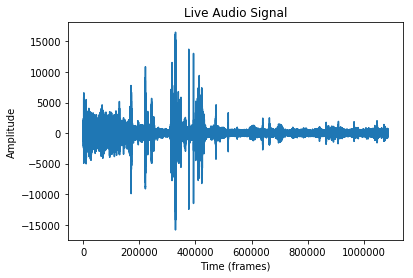

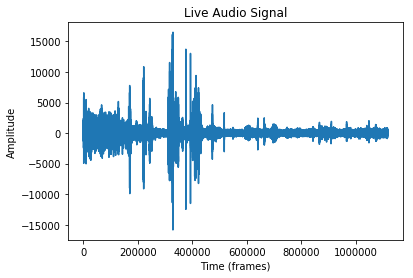

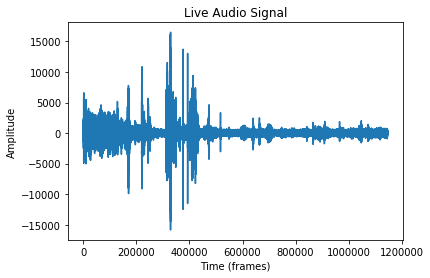

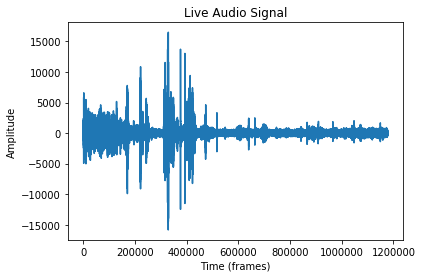

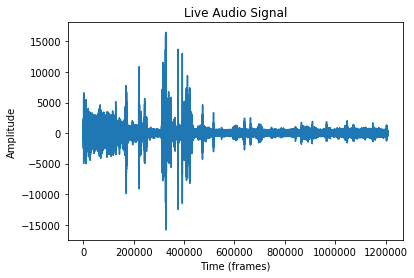

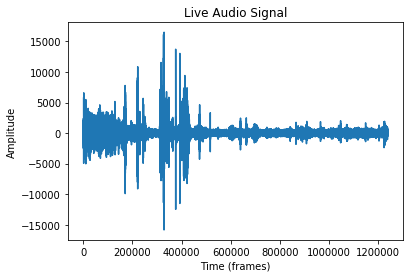

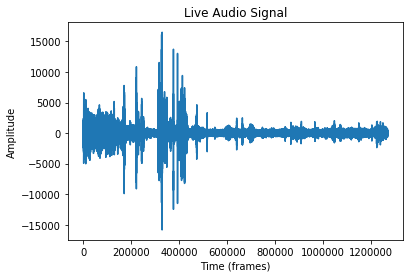

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/david/anaconda3/envs/mdp/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/david/anaconda3/envs/mdp/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-9ee58c36ff1e>", line 28, in update_plot
    plt.plot(np.arange(len(audio_signal)), audio_signal)
  File "/Users/david/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/pyplot.py", line 2811, in plot
    is not None else {}), **kwargs)
  File "/Users/david/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/__init__.py", line 1810, in inner
    return func(ax, *args, **kwargs)
  File "/Users/david/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 1611, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/david/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 393, in

Recording stopped.


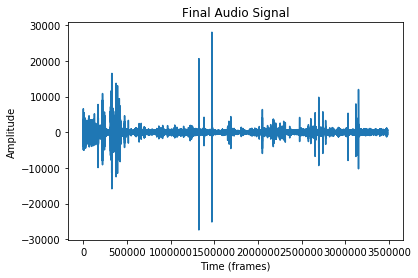

In [2]:


# Constants
CHUNK_SIZE = 10*1024  # Number of audio frames per buffer
FORMAT = pyaudio.paInt16
CHANNELS = 1  # Mono audio input
RATE = 44100  # Sample rate in Hz
PLOT_INTERVAL = 100  # Update the plot every 100 chunks (adjust as needed)

# Initialize PyAudio
audio = pyaudio.PyAudio()

# Create an empty buffer for audio data
audio_buffer = np.zeros(CHUNK_SIZE)

# Create a list to store the audio signal
audio_signal = []

# Create a flag to control the audio recording
recording = True

# Create a function to continuously update the plot
def update_plot():
    global audio_signal
    while recording:
        if len(audio_signal) > CHUNK_SIZE * PLOT_INTERVAL:
            plt.clf()
            plt.plot(np.arange(len(audio_signal)), audio_signal)
            plt.xlabel('Time (frames)')
            plt.ylabel('Amplitude')
            plt.title('Live Audio Signal')
            plt.pause(0.01)

# Create a thread for the plot updating function
plot_thread = threading.Thread(target=update_plot)
plot_thread.start()

# Create an audio stream for input
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK_SIZE)

print("Recording... Press Ctrl+C to stop.")

try:
    while recording:
        data = stream.read(CHUNK_SIZE)
        audio_buffer = np.frombuffer(data, dtype=np.int16)
        audio_signal.extend(audio_buffer)

except KeyboardInterrupt:
    print("Recording stopped.")

# Close the audio stream and terminate PyAudio
stream.stop_stream()
stream.close()
audio.terminate()

# Stop the plot thread
recording = False
plot_thread.join()

# Display the final audio signal plot
plt.plot(np.arange(len(audio_signal)), audio_signal)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.title('Final Audio Signal')
plt.show()